In [1]:
# !pip install pycaret


"파베르"님의 코드를 참고했습니다.

출처 : https://dacon.io/competitions/official/235745/codeshare/2851?page=1&dtype=recent

"Jay Hong"님의 코드를 참고했습니다.

출처 : https://dacon.io/competitions/official/235745/codeshare/2958?page=1&dtype=recent

7-29
1. 데이콘 설명을 읽고 데이터에 대해 생각함.
2. 오류 데이터를 제거
3. 임대보증금과 임대료의 이상치를 살펴봄(제거)
4. fillna(임대료, 임대보증금)

7-31
1. fillna(자격유형,지하철)
2. encoding
3. scailing
4. pycaret 사용해보기

8-1
1. 전용면적
2. set_index
3. 임대건물구분/공급유형/자격유형
1. pycaret 사용

* 새로운 라이브러리 pycaret에 대해 알게되어 공부했습니다.
* NaN값에 단순히 0,-1값이 아닌 보다 의미있는 값을 채우기 위해 고민하는 과정에서 도메인에 대한 이해의 중요성을 다시 느꼈습니다. 또한, 데이터 전처리 방법에 대해 많은 학습이 필요하다는 점을 느꼈습니다.


# 설명

평가

평가산식 : MAE(Mean Absolute Error)

Public 평가 : 전체 Test 데이터 중 무작위 33% (50단지)

Private 평가 : 전체 Test 데이터 중 나머지 67% (100단지)

주제: **유형별 임대주택 설계 시 단지 내 적정 주차 수요를 예측**

* 아파트 단지 내 필요한 주차대수는
 1. 법정주차대수
 2. 장래주차대수
 중 큰 값에 따라 결정하게되어 있어, **정확한 2. 장래주차수요의 산정**을 필요로합니다.

**현재** 2. 장래주차수요는 **'주차원단위'와 '건축연면적'을 기초로하여 산출**되고 있으며, **'주차원단위'는 신규 건축예정 부지 인근의 유사 단지를 피크 시간대 방문하여 주차된 차량대수를 세는 방법**으로 조사하고 있습니다.

이 경우 인력조사로 인한 오차발생, 현장조사 시점과 실제 건축 시점과의 시간차 등의 문제로 과대 또는 과소 산정의 가능성을 배제할 수 없습니다.

전용면적별 세대수는 '임대'아파트 대상만으로 집계가 되어있고

전체세대수에는 '분양'아파트가 포함된 수치입니다.

즉, 분양된 수만큼 차이가 발생하게 됩니다.

또한 주차 공간은 임대/분양 상관 없이 공용으로 사용되고 있습니다.


이상의 아파트는 총세대와 임대세대 합 차이가 1인 곳입니다. 
답변 하신 내용으로는 분양이 1세대만 진행되었는데 가능한 이야기 인가요? 
합의 차이가 1이 나는 부분은 대부분 상가가 분양 된 경우가 많으나 절대적이지는 않습니다.

1. 전용면적별 세대수 합계와 총세대수가 일치하지 않는 경우  

 - (오류 내용) 제공한 데이터(트레인 및 테스트) 중 총 58개 단지에서 전용면적별 세대수 합계가 총세대수보다 적은 경우가 발생하였습니다. 

 - (분포 현황) 차이는 최소 1세대부터 최대 452세대까지이며, 그 가운데 48개 단지(83%) 는 차이가 1~14세대, 
 
 나머지 10개 단지(17%) 는 차이가 94~452세대 사이에 분포합니다. 

 - (발생 원인) 차이는 분양상가 또는 분양아파트가 임대단지 안에 혼합되어 발생한 것으로, 분양 완료된 상가 ․ 아파트는 관리대상에서 제외되어 전용면적별 세대수에서는 포함되지 않았으나 총세대수에는 포함되었습니다. 

 - (관련 데이터) 차이가 14세대 이하인 48개 단지는 분양상가, 차이가 94~452세대에 분포하는 10개 단지는 분양아파트 혼합단지인 것으로 확인되며, 아래 10개 단지의 코드를 확인하셔서 데이터 분석에 참고해주시기 바랍니다.

※ 차이가 14세대 이하인 48개 단지 : 하단 별첨 참조

※ 별첨 : 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']

※ 차이가 94~452세대인 10개 단지(크기순) : ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

# import library and data

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle study/[5]parking demand/train.csv")

In [63]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle study/[5]parking demand/test.csv")

In [64]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle study/[5]parking demand/sample_submission.csv")

In [65]:
age_gender_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle study/[5]parking demand/age_gender_info.csv")

In [66]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


target = 등록 차량 수

# 데이터 오류 제거 
https://dacon.io/competitions/official/235745/talkboard/403708?page=1&dtype=recent

2번오류

In [67]:
drop_idx = train.loc[(train['단지코드'] =='C2085')|(train['단지코드'] =='C1397')|(train['단지코드'] =='C2431')|(train['단지코드'] =='C1649')|(train['단지코드'] =='C1036')].index

In [68]:
train = train.drop(drop_idx,axis = 0)

In [69]:
# drop_idx = test.loc[(test['단지코드'] =='C2675')].index
# test = test.drop(drop_idx,axis = 0)

3번 오류

In [70]:
drop_idx = train.loc[(train['단지코드'] =='C1095')|(train['단지코드'] =='C2051')|(train['단지코드'] =='C1218')|(train['단지코드'] =='C1894')|(train['단지코드'] =='C2483')|(train['단지코드'] =='C1502')|(train['단지코드'] =='C1988')].index

In [71]:
train = train.drop(drop_idx,axis = 0)

In [72]:
# drop_idx = test.loc[(test['단지코드'] =='C2335')|(test['단지코드'] =='C1327')].index
# test = test.drop(drop_idx,axis = 0)

In [73]:
# test = test.drop(drop_idx,axis = 0)

# check dataset

In [74]:
train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

In [75]:
submission.head()

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0


In [76]:
age_gender_info.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [77]:
print(train.duplicated().sum())
train = train.drop_duplicates()
print(test.duplicated().sum())
test = test.drop_duplicates()

320
73


In [78]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0


In [79]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [80]:
train.rename(columns = {'도보 10분거리 내 지하철역 수(환승노선 수 반영)':'subway','도보 10분거리 내 버스정류장 수':'bus_stop'}, inplace = True)
test.rename(columns = {'도보 10분거리 내 지하철역 수(환승노선 수 반영)':'subway','도보 10분거리 내 버스정류장 수':'bus_stop'}, inplace = True)

# preprocess

In [81]:
dash = train
dash = dash[(dash['임대보증금']=='-')].index
train.loc[dash,'임대보증금'] = np.NaN
dash = train
dash = dash[(dash['임대료']=='-')].index
train.loc[dash,'임대료'] = np.NaN
dash = test
dash = dash[(dash['임대보증금']=='-')].index
test.loc[dash,'임대보증금'] = np.NaN
dash = test
dash = dash[(dash['임대료']=='-')].index
test.loc[dash,'임대료'] = np.NaN

In [82]:
# dash = test.loc[test['공급유형']=='영구임대']
# dash = dash[(dash['임대보증금']=='-')].index
# test.loc[dash,'임대보증금'] = np.NaN

In [83]:
train['임대료']= train['임대료'].astype(float)
train['임대보증금']= train['임대보증금'].astype(float)
test['임대료']= test['임대료'].astype(float)
test['임대보증금']= test['임대보증금'].astype(float)

이상치(임대보증금, 임대료)

In [84]:
train['temp'] = 1

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_

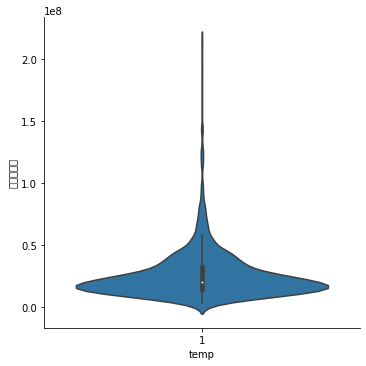

In [85]:
sns.catplot(data = train, x = 'temp', y = '임대보증금',kind = 'violin')

nan이 포함된 자료의 percentile()의 결과는 nan이 반환된다.
이 경우 nanpercentile() 함수를 사용하면 nan값을 무시한다.

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=enshs&logNo=220985100525

In [86]:
percent99 = np.nanpercentile(train.임대보증금,99)
percent99

115008440.0

In [87]:
percent98 = np.nanpercentile(train.임대보증금,98)
percent98

79706855.9999998

임대보증금이 1억이 넘는 것은 이상치로 생각하여 제거(25개)

In [88]:
idx = train.loc[(train.임대보증금>100000000)].index
train.index.difference(idx)
train = train.loc[train.index.difference(idx)]

In [89]:
print(len(train))
print(len(idx))

2524
25


In [90]:
percent100 = np.nanpercentile(train.임대료,100)
percent100

962150.0

In [91]:
percent99 = np.nanpercentile(train.임대료,99)
percent99

620000.0

In [92]:
percent98 = np.nanpercentile(train.임대료,98)
percent98

580000.0

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text

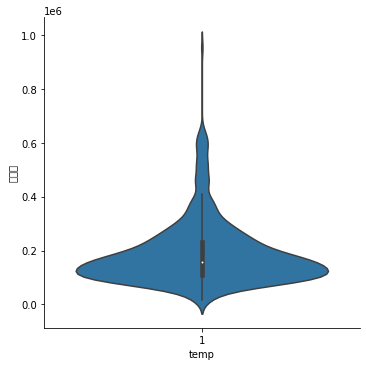

In [93]:
sns.catplot(data = train, x = 'temp', y = '임대료',kind = 'violin')

In [94]:
idx = train.loc[(train.임대료>600000.0)].index
train.index.difference(idx)
train = train.loc[train.index.difference(idx)]

In [95]:
print(len(train))
print(len(idx))

2498
26


임대료 60만원 넘는 것은 이상치로 생각하여 제거

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text

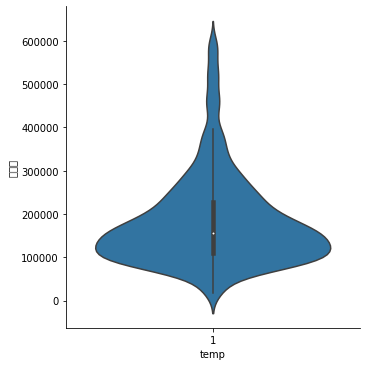

In [96]:
sns.catplot(data = train, x = 'temp', y = '임대료',kind = 'violin')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_

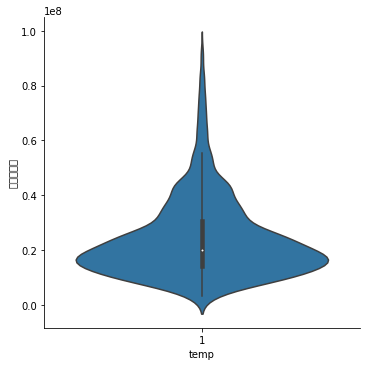

In [97]:
sns.catplot(data = train, x = 'temp', y = '임대보증금',kind = 'violin')

In [98]:
train = train.drop(['temp'],axis =1)

In [99]:
train.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,subway,bus_stop,단지내주차면수,등록차량수
count,2498.000000,2498.000000,2498.000000,2498.000000,2.194000e+03,2194.000000,2347.000000,2498.000000,2498.000000,2498.000000
mean,856.778223,45.244107,114.986789,13.309448,2.408368e+07,183356.686418,0.166170,3.642114,624.317854,586.544436
std,491.155452,32.867491,137.145516,10.442086,1.465135e+07,106417.427218,0.426725,2.585506,391.888355,430.658540
min,26.000000,12.620000,1.000000,0.000000,3.056000e+06,16650.000000,0.000000,0.000000,13.000000,13.000000
25%,504.000000,36.380000,26.000000,5.000000,1.421225e+07,110500.000000,0.000000,2.000000,329.000000,281.000000
50%,773.000000,46.175000,78.000000,13.000000,1.997300e+07,155920.000000,0.000000,3.000000,542.000000,507.500000
75%,1065.000000,51.600000,154.000000,20.000000,3.070900e+07,227770.000000,0.000000,4.000000,845.000000,783.000000
max,2568.000000,583.400000,1865.000000,55.000000,9.348600e+07,600000.000000,3.000000,20.000000,1798.000000,2550.000000


# Fill Null Data

## check null

In [100]:
train.dtypes

단지코드         object
총세대수          int64
임대건물구분       object
지역           object
공급유형         object
전용면적        float64
전용면적별세대수      int64
공가수         float64
자격유형         object
임대보증금       float64
임대료         float64
subway      float64
bus_stop    float64
단지내주차면수     float64
등록차량수       float64
dtype: object

In [101]:
test.dtypes

단지코드         object
총세대수          int64
임대건물구분       object
지역           object
공급유형         object
전용면적        float64
전용면적별세대수      int64
공가수         float64
자격유형         object
임대보증금       float64
임대료         float64
subway      float64
bus_stop    float64
단지내주차면수     float64
dtype: object

In [102]:
train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       304
임대료         304
subway      151
bus_stop      0
단지내주차면수       0
등록차량수         0
dtype: int64

In [103]:
test.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          2
임대보증금       120
임대료         120
subway       34
bus_stop      0
단지내주차면수       0
dtype: int64

## 임대보증금과 임대료

In [104]:
train_NAN = train[train['임대료'].isnull()]
test_NAN = test[test['임대료'].isnull()]
train_tmp = train.loc[train.index.difference(train_NAN.index)]
test_tmp = test.loc[test.index.difference(test_NAN.index)]
train_NAN

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,subway,bus_stop,단지내주차면수,등록차량수
80,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
83,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
94,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
96,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2611,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2823,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2824,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0


In [105]:
train_NAN.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,subway,bus_stop,단지내주차면수,등록차량수
count,304.000000,304.000000,304.000000,304.000000,0.0,0.0,225.000000,304.000000,304.000000,304.000000
mean,1302.697368,57.342796,12.546053,7.154605,NaN,NaN,0.395556,3.529605,345.740132,240.444079
std,630.686143,87.931477,61.480023,9.845964,NaN,NaN,0.490060,2.317770,321.052963,362.548584
min,410.000000,12.620000,1.000000,0.000000,NaN,NaN,0.000000,1.000000,65.000000,31.000000
25%,779.000000,23.902500,1.000000,1.000000,NaN,NaN,0.000000,2.000000,166.000000,94.000000
50%,1064.500000,32.875000,1.000000,2.000000,NaN,NaN,0.000000,3.000000,240.000000,129.000000
75%,1755.000000,50.080000,1.000000,7.000000,NaN,NaN,1.000000,4.000000,405.000000,253.000000
max,2428.000000,583.400000,590.000000,43.000000,NaN,NaN,1.000000,12.000000,1670.000000,2315.000000


In [106]:
train_tmp.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,subway,bus_stop,단지내주차면수,등록차량수
count,2194.000000,2194.000000,2194.000000,2194.000000,2.194000e+03,2194.000000,2122.000000,2194.000000,2194.000000,2194.000000
mean,794.991796,43.567716,129.180948,14.162261,2.408368e+07,183356.686418,0.141847,3.657703,662.917502,634.500000
std,433.973057,11.773728,138.700051,10.236159,1.465135e+07,106417.427218,0.412158,2.620549,385.195571,417.264985
min,26.000000,16.020000,2.000000,0.000000,3.056000e+06,16650.000000,0.000000,0.000000,13.000000,13.000000
25%,492.000000,36.630000,40.000000,7.000000,1.421225e+07,110500.000000,0.000000,2.000000,375.000000,343.250000
50%,720.000000,46.465000,90.000000,13.000000,1.997300e+07,155920.000000,0.000000,3.000000,600.000000,555.000000
75%,1005.000000,51.625000,169.500000,20.000000,3.070900e+07,227770.000000,0.000000,4.000000,880.000000,818.750000
max,2568.000000,84.990000,1865.000000,55.000000,9.348600e+07,600000.000000,3.000000,20.000000,1798.000000,2550.000000


In [107]:
train_NAN['공급유형'].value_counts()

임대상가    285
국민임대      8
공공분양      7
행복주택      4
Name: 공급유형, dtype: int64

In [108]:
train_tmp['공급유형'].value_counts()

국민임대         1679
행복주택          187
영구임대          149
공공임대(10년)     142
공공임대(50년)      31
공공임대(5년)        3
공공임대(분납)        3
Name: 공급유형, dtype: int64

In [109]:
test_NAN['공급유형'].value_counts()

임대상가    112
행복주택      4
영구임대      4
Name: 공급유형, dtype: int64

In [110]:
test_tmp['공급유형'].value_counts()

국민임대         619
행복주택         117
영구임대          40
공공임대(10년)     34
공공임대(50년)     13
공공임대(분납)       6
Name: 공급유형, dtype: int64

In [111]:
train.loc[train['공급유형']=='공공분양',['임대보증금','임대료']]=train.loc[train['공급유형']=='공공분양',['임대보증금','임대료']].fillna(0)
test.loc[test['공급유형']=='공공분양',['임대보증금','임대료']]=test.loc[test['공급유형']=='공공분양',['임대보증금','임대료']].fillna(0)
train.loc[train['공급유형']=='임대상가',['임대보증금','임대료']]=train.loc[train['공급유형']=='임대상가',['임대보증금','임대료']].fillna(-1)
test.loc[test['공급유형']=='임대상가',['임대보증금','임대료']]=test.loc[test['공급유형']=='임대상가',['임대보증금','임대료']].fillna(-1)

In [112]:
mean = train_tmp[train_tmp['공급유형']=='국민임대']['임대보증금'].mean()
train.loc[(train['공급유형']=='국민임대')&(train['임대보증금'].isnull()),'임대보증금'] = mean
mean = train_tmp[train_tmp['공급유형']=='국민임대']['임대료'].mean()
train.loc[(train['공급유형']=='국민임대')&(train['임대료'].isnull()),'임대료'] = mean

mean = train_tmp[train_tmp['공급유형']=='행복주택']['임대보증금'].mean()
train.loc[(train['공급유형']=='행복주택')&(train['임대보증금'].isnull()),'임대보증금'] = mean
mean = train_tmp[train_tmp['공급유형']=='행복주택']['임대료'].mean()
train.loc[(train['공급유형']=='행복주택')&(train['임대료'].isnull()),'임대료'] = mean

In [113]:
mean = test_tmp[test_tmp['공급유형']=='영구임대']['임대보증금'].mean()
test.loc[(test['공급유형']=='영구임대')&(test['임대보증금'].isnull()),'임대보증금'] = mean
mean = test_tmp[test_tmp['공급유형']=='영구임대']['임대료'].mean()
test.loc[(test['공급유형']=='영구임대')&(test['임대료'].isnull()),'임대료'] = mean

mean = test_tmp[test_tmp['공급유형']=='행복주택']['임대보증금'].mean()
test.loc[(test['공급유형']=='행복주택')&(test['임대보증금'].isnull()),'임대보증금'] = mean
mean = test_tmp[test_tmp['공급유형']=='행복주택']['임대료'].mean()
test.loc[(test['공급유형']=='행복주택')&(test['임대료'].isnull()),'임대료'] = mean

* 공공분양은 임대가 아니기 때문에 임대보증금과 임대료가 없을 것이라고 생각하여 0으로 채움
* **임대상가는 -1값으로 채움.(고민)**
* 국민임대, 행복주택, 영구임대는 mean값으로 채움


## 자격유형

In [114]:
test[test.자격유형.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,subway,bus_stop,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [115]:
test.groupby(['공급유형','자격유형']).count()['총세대수']

공급유형       자격유형
공공임대(10년)  A        34
공공임대(50년)  A        13
공공임대(분납)   A         6
국민임대       A       515
           E        10
           G         1
           H        92
영구임대       C        34
           D         2
           I         7
임대상가       D       112
행복주택       J        81
           K        16
           L        12
           M         2
           N        10
Name: 총세대수, dtype: int64

In [116]:
test.loc[196,'자격유형'] = 'A'
test.loc[258,'자격유형'] = 'C'

공급유형과 자격유형의 개수를 세서 공급유형별 가장 많은 자격유형의 값으로 NaN값을 채웠다.

## 지하철


In [117]:
train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
subway      151
bus_stop      0
단지내주차면수       0
등록차량수         0
dtype: int64

In [118]:
train.subway.value_counts()

0.0    2002
1.0     306
2.0      33
3.0       6
Name: subway, dtype: int64

In [119]:
train[train.subway.isnull()]['지역'].value_counts()

충청남도     82
대전광역시    69
Name: 지역, dtype: int64

In [120]:
train[train.subway==0]['지역'].value_counts().sort_values(ascending = False)

경기도        465
경상남도       299
강원도        165
충청북도       161
전라남도       145
광주광역시      139
부산광역시      122
경상북도       109
전라북도       107
제주특별자치도     69
대구광역시       62
대전광역시       47
충청남도        43
울산광역시       26
세종특별자치시     24
서울특별시       19
Name: 지역, dtype: int64

In [121]:
train[train.subway==1]['지역'].value_counts().sort_values(ascending = False)

부산광역시    98
경기도      88
대전광역시    87
대구광역시    23
서울특별시    10
Name: 지역, dtype: int64

In [122]:
train[train.subway==2]['지역'].value_counts().sort_values(ascending = False)

경기도      17
대구광역시    12
부산광역시     4
Name: 지역, dtype: int64

In [123]:
train[train.subway==3]['지역'].value_counts().sort_values(ascending = False)

부산광역시    6
Name: 지역, dtype: int64

In [124]:
train_tmp = train[train.지역=='대전광역시']
train_tmp1 = train_tmp.loc[(train_tmp['단지내주차면수']<train_tmp['등록차량수']),] # 주차공간부족
train_tmp2 = train_tmp.loc[(train_tmp['단지내주차면수']>=train_tmp['등록차량수']),] # 주차공간충분

In [125]:
train_tmp1['subway'].value_counts(normalize = True)

0.0    0.766667
1.0    0.233333
Name: subway, dtype: float64

In [126]:
train_tmp2['subway'].value_counts(normalize = True)

1.0    0.769231
0.0    0.230769
Name: subway, dtype: float64

In [127]:
train.groupby(['subway']).mean()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,bus_stop,단지내주차면수,등록차량수
subway,,,,,,,,,
0.0,813.416583,44.787772,117.460040,14.416084,2.239517e+07,168179.056312,3.462537,638.785714,609.315684
1.0,1132.673203,46.920654,106.633987,9.421569,1.975407e+07,158132.192810,4.555556,616.921569,512.248366
2.0,751.969697,41.289697,113.727273,8.636364,2.370055e+07,190416.969697,4.121212,655.939394,689.363636
3.0,291.000000,48.203333,48.500000,26.000000,4.651633e+07,386970.000000,4.000000,257.000000,166.000000


In [128]:
train.loc[(train['지역']=='충청남도')&train['subway'].isnull(),'subway'] = 0

In [129]:
train.loc[(train['지역']=='대전광역시')&(train['bus_stop']<=3)&(train['subway'].isnull()),'subway'] = 0 # 버스정류장 3개 이하
train.loc[(train['지역']=='대전광역시')&(train['bus_stop']>3)&(train['subway'].isnull()),'subway'] = 1 # 버스정류장 4개이상

In [130]:
test.isnull().sum()

단지코드         0
총세대수         0
임대건물구분       0
지역           0
공급유형         0
전용면적         0
전용면적별세대수     0
공가수          0
자격유형         0
임대보증금        0
임대료          0
subway      34
bus_stop     0
단지내주차면수      0
dtype: int64

In [131]:
test[test.subway.isnull()]['지역'].value_counts()

충청남도     26
대전광역시     8
Name: 지역, dtype: int64

In [132]:
test.loc[(test['지역']=='충청남도')&test['subway'].isnull(),'subway']=0

In [133]:
test.loc[(test['지역']=='대전광역시')&(test['bus_stop']<=3)&(test['subway'].isnull()),'subway'] = 0 # 버스정류장 3개 이하
test.loc[(test['지역']=='대전광역시')&(test['bus_stop']>3)&(test['subway'].isnull()),'subway'] = 1 # 버스정류장 4개이상

In [134]:
train.isnull().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        0
임대보증금       0
임대료         0
subway      0
bus_stop    0
단지내주차면수     0
등록차량수       0
dtype: int64

In [135]:
test.isnull().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        0
임대보증금       0
임대료         0
subway      0
bus_stop    0
단지내주차면수     0
dtype: int64

지하철역이 1개 이상이라고 적인 지역은 부산광역시, 대전광역시, 경기도, 대구광역시, 서울특별시이다.

따라서 충청남도 지하철에는 0값을 넣는다. 

대전광역시는 주차공간부족이면 지하쳘에 값 0을 넣고, 주차공간충분이면 지하철에 1을 넣는다. ->testset에는 적용이 어려울 거 같아 기준을 버스정류장 개수로 바꾸었다.

## age_gender_info

In [136]:
age_gender_info.isnull().sum()

지역           0
10대미만(여자)    0
10대미만(남자)    0
10대(여자)      0
10대(남자)      0
20대(여자)      0
20대(남자)      0
30대(여자)      0
30대(남자)      0
40대(여자)      0
40대(남자)      0
50대(여자)      0
50대(남자)      0
60대(여자)      0
60대(남자)      0
70대(여자)      0
70대(남자)      0
80대(여자)      0
80대(남자)      0
90대(여자)      0
90대(남자)      0
100대(여자)     0
100대(남자)     0
dtype: int64

# 단지코드를 인덱스로 지정

In [137]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,subway,bus_stop,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0
2865,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2866,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2867,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0


In [138]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', 'subway', 'bus_stop', '단지내주차면수', '등록차량수'],
      dtype='object')

In [139]:
train_col = ['총세대수','지역','공가수','subway','bus_stop','단지내주차면수','등록차량수']
test_col = ['총세대수','지역','공가수','subway','bus_stop','단지내주차면수']

rest_col = train.columns.difference(train_col)
rest_col

Index(['공급유형', '단지코드', '임대건물구분', '임대료', '임대보증금', '자격유형', '전용면적', '전용면적별세대수'], dtype='object')

In [140]:
train_code = train.set_index(['단지코드'])[train_col].drop_duplicates()
test_code = test.set_index(['단지코드'])[test_col].drop_duplicates()

In [141]:
train_code

,총세대수,지역,공가수,subway,bus_stop,단지내주차면수,등록차량수
단지코드,,,,,,,
C2515,545,경상남도,17.0,0.0,3.0,624.0,205.0
C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,1064.0
C1945,755,경기도,6.0,1.0,3.0,734.0,730.0
C1470,696,전라북도,14.0,0.0,2.0,645.0,553.0
C1898,566,전라북도,9.0,0.0,6.0,517.0,415.0
...,...,...,...,...,...,...,...
C2586,90,제주특별자치도,7.0,0.0,3.0,66.0,57.0
C2035,492,강원도,24.0,0.0,1.0,521.0,246.0
C2020,40,부산광역시,7.0,1.0,2.0,25.0,19.0


# 전용면적

In [142]:
train_g = train.groupby(['단지코드','전용면적']).sum()
test_g = test.groupby(['단지코드','전용면적']).sum()

In [143]:
(train.전용면적).describe()

count    2498.000000
mean       45.244107
std        32.867491
min        12.620000
25%        36.380000
50%        46.175000
75%        51.600000
max       583.400000
Name: 전용면적, dtype: float64

In [144]:
train_code['전용면적1'] = 0
train_code['전용면적2'] = 0
train_code['전용면적3'] = 0

test_code['전용면적1'] = 0
test_code['전용면적2'] = 0
test_code['전용면적3'] = 0

In [145]:
for idx,val in zip(train_g.index,train_g.values):
  if (idx[1]<36.38):
    train_code.loc[idx[0],'전용면적1'] += val[1]
  elif (idx[1]>=36.38 and idx[1]<51.6):
    train_code.loc[idx[0],'전용면적2'] += val[1]
  else:
    train_code.loc[idx[0],'전용면적3'] += val[1]

for idx,val in zip(test_g.index,test_g.values):
  if (idx[1]<36.38):
    test_code.loc[idx[0],'전용면적1'] += val[1]
  elif (idx[1]>=36.38 and idx[1]<51.6):
    test_code.loc[idx[0],'전용면적2'] += val[1]
  else:
    test_code.loc[idx[0],'전용면적3'] += val[1]

In [146]:
test_code

,총세대수,지역,공가수,subway,bus_stop,단지내주차면수,전용면적1,전용면적2,전용면적3
단지코드,,,,,,,,,
C1072,754,경기도,14.0,0.0,2.0,683.0,0.0,438.0,316.0
C1128,1354,경기도,9.0,0.0,3.0,1216.0,0.0,776.0,578.0
C1456,619,부산광역시,18.0,0.0,16.0,547.0,82.0,275.0,176.0
C1840,593,전라북도,7.0,0.0,3.0,543.0,0.0,509.0,84.0
C1332,1297,경기도,11.0,0.0,2.0,1112.0,0.0,993.0,304.0
...,...,...,...,...,...,...,...,...,...
C2456,349,제주특별자치도,17.0,0.0,4.0,270.0,112.0,234.0,0.0
C1266,596,충청북도,35.0,0.0,1.0,593.0,180.0,411.0,0.0
C2152,120,강원도,9.0,0.0,1.0,40.0,120.0,0.0,0.0


In [147]:
rest_col = rest_col.drop(['전용면적','전용면적별세대수'])
rest_col

Index(['공급유형', '단지코드', '임대건물구분', '임대료', '임대보증금', '자격유형'], dtype='object')

# 임대건물구분(아파트/상가)

In [148]:
train.임대건물구분.value_counts()

아파트    2213
상가      285
Name: 임대건물구분, dtype: int64

In [149]:
res = train.drop_duplicates(['단지코드','임대건물구분']).assign(counter = 1).pivot(index = '단지코드',columns = '임대건물구분',values = 'counter').fillna(0)
res.columns.name = None
res = res.rename(columns={col:'임대건물구분'+'_'+col for col in res.columns})
res

,임대건물구분_상가,임대건물구분_아파트
단지코드,,
C1000,0.0,1.0
C1004,1.0,1.0
C1005,0.0,1.0
C1013,0.0,1.0
C1014,0.0,1.0
...,...,...
C2663,0.0,1.0
C2666,0.0,1.0
C2670,0.0,1.0


In [150]:
def reshape_cat_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+col for col in res.columns})
    return res

In [151]:
reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter')
reshape_cat_features(data=test, cast_col='임대건물구분', value_col='counter')

,임대건물구분_상가,임대건물구분_아파트
단지코드,,
C1003,0.0,1.0
C1006,1.0,1.0
C1016,0.0,1.0
C1019,0.0,1.0
C1030,0.0,1.0
...,...,...
C2653,0.0,1.0
C2675,0.0,1.0
C2676,1.0,1.0


# 공급유형

국민임대

장기 거주는 가능하지만 해당 주거지를 매입할 수 없다.

공공임대

임대 기간이 종료 후 입주자에게 우선 분양 전환혜택을 준다.

In [152]:
pd.concat([train.공급유형.value_counts(), test.공급유형.value_counts()], axis=1)

,공급유형,공급유형
국민임대,1687,619.0
임대상가,285,112.0
행복주택,191,121.0
영구임대,149,44.0
공공임대(10년),142,34.0
공공임대(50년),31,13.0
공공분양,7,NaN
공공임대(5년),3,NaN
공공임대(분납),3,6.0


In [153]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

In [154]:
set(train.공급유형)

{'공공임대(50년)', '공공임대(5년/10년/분납/분양)', '국민임대/장기전세', '영구임대', '임대상가', '행복주택'}

In [155]:
set(test.공급유형)

{'공공임대(50년)', '공공임대(5년/10년/분납/분양)', '국민임대/장기전세', '영구임대', '임대상가', '행복주택'}

In [156]:
reshape_cat_features(data=train, cast_col='공급유형', value_col='counter')
reshape_cat_features(data=test, cast_col='공급유형', value_col='counter')

,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택
단지코드,,,,,,
C1003,0.0,0.0,0.0,0.0,0.0,1.0
C1006,0.0,0.0,0.0,1.0,1.0,0.0
C1016,0.0,0.0,1.0,0.0,0.0,0.0
C1019,0.0,0.0,1.0,0.0,0.0,0.0
C1030,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
C2653,0.0,0.0,1.0,0.0,0.0,0.0
C2675,0.0,0.0,1.0,0.0,0.0,0.0
C2676,0.0,0.0,0.0,1.0,1.0,0.0


# 자격유형

자격유형별 소득수준을 간접적으로 파악하기 위해 자격유형별 임대보증금의 평균, 임대료의 평균을 변수로 사용해 볼 수 있을 것 같음


In [157]:
pd.concat([train.자격유형.value_counts(), 
           test.자격유형.value_counts()], axis=1)

,자격유형,자격유형
A,1665,569.0
D,292,114.0
H,154,92.0
J,93,81.0
C,92,35.0
I,49,7.0
L,33,12.0
K,33,16.0
N,29,10.0
E,25,10.0


In [158]:
train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'

In [159]:
pd.concat([train.자격유형.value_counts(), 
           test.자격유형.value_counts()], axis=1)

,자격유형,자격유형
A,1665,569
D,292,114
국민임대/장기전세_공급대상,206,103
행복주택_공급대상,191,121
영구임대_공급대상,144,42


In [160]:
reshape_cat_features(data=train, cast_col='자격유형', value_col='counter')
reshape_cat_features(data=test, cast_col='자격유형', value_col='counter')

,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
단지코드,,,,,
C1003,0.0,0.0,0.0,0.0,1.0
C1006,0.0,1.0,0.0,1.0,0.0
C1016,1.0,0.0,0.0,0.0,0.0
C1019,1.0,0.0,0.0,0.0,0.0
C1030,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
C2653,1.0,0.0,0.0,0.0,0.0
C2675,1.0,0.0,0.0,0.0,0.0
C2676,0.0,1.0,0.0,1.0,0.0


# 코드 합치기

In [161]:
train_code = pd.concat([train_code,
                       reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=train, cast_col='공급유형', value_col='counter'),
                       reshape_cat_features(data=train, cast_col='자격유형', value_col='counter')], axis=1)

test_code = pd.concat([test_code,
                       reshape_cat_features(data=test, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=test, cast_col='공급유형', value_col='counter'),
                       reshape_cat_features(data=test, cast_col='자격유형', value_col='counter')], axis=1)

In [162]:
train_code.shape, test_code.shape

((406, 23), (150, 22))

# encoding

In [163]:
from sklearn import preprocessing

In [164]:
train = train_code
test = test_code

In [165]:
train

,총세대수,지역,공가수,subway,bus_stop,단지내주차면수,등록차량수,전용면적1,전용면적2,전용면적3,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
C2515,545,경상남도,17.0,0.0,3.0,624.0,205.0,276.0,137.0,132.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,1064.0,390.0,524.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1945,755,경기도,6.0,1.0,3.0,734.0,730.0,0.0,120.0,515.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C1470,696,전라북도,14.0,0.0,2.0,645.0,553.0,0.0,450.0,246.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1898,566,전라북도,9.0,0.0,6.0,517.0,415.0,0.0,480.0,86.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2586,90,제주특별자치도,7.0,0.0,3.0,66.0,57.0,54.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
C2035,492,강원도,24.0,0.0,1.0,521.0,246.0,156.0,336.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2020,40,부산광역시,7.0,1.0,2.0,25.0,19.0,25.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
C2437,90,충청북도,12.0,0.0,1.0,30.0,16.0,90.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [166]:
train.지역.value_counts().sort_values(ascending = False)

경기도        84
경상남도       51
강원도        37
충청북도       30
부산광역시      25
대전광역시      25
광주광역시      24
전라남도       24
경상북도       21
전라북도       21
충청남도       19
대구광역시      18
제주특별자치도    14
울산광역시       6
서울특별시       4
세종특별자치시     3
Name: 지역, dtype: int64

In [167]:
encoder = preprocessing.LabelEncoder()
train['지역'] = encoder.fit_transform(train['지역'])
test['지역'] = encoder.fit_transform(test['지역'])

In [168]:
train.지역.value_counts().sort_values(ascending = False)

1     84
2     51
0     37
15    30
6     25
7     25
4     24
11    24
3     21
12    21
14    19
5     18
13    14
10     6
8      4
9      3
Name: 지역, dtype: int64

In [169]:
test.dtypes

총세대수                         int64
지역                           int64
공가수                        float64
subway                     float64
bus_stop                   float64
단지내주차면수                    float64
전용면적1                      float64
전용면적2                      float64
전용면적3                      float64
임대건물구분_상가                  float64
임대건물구분_아파트                 float64
공급유형_공공임대(50년)             float64
공급유형_공공임대(5년/10년/분납/분양)    float64
공급유형_국민임대/장기전세             float64
공급유형_영구임대                  float64
공급유형_임대상가                  float64
공급유형_행복주택                  float64
자격유형_A                     float64
자격유형_D                     float64
자격유형_국민임대/장기전세_공급대상        float64
자격유형_영구임대_공급대상             float64
자격유형_행복주택_공급대상             float64
dtype: object

In [170]:
train

,총세대수,지역,공가수,subway,bus_stop,단지내주차면수,등록차량수,전용면적1,전용면적2,전용면적3,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
C2515,545,2,17.0,0.0,3.0,624.0,205.0,276.0,137.0,132.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1407,1216,6,13.0,1.0,1.0,1285.0,1064.0,390.0,524.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1945,755,1,6.0,1.0,3.0,734.0,730.0,0.0,120.0,515.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C1470,696,12,14.0,0.0,2.0,645.0,553.0,0.0,450.0,246.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1898,566,12,9.0,0.0,6.0,517.0,415.0,0.0,480.0,86.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2586,90,13,7.0,0.0,3.0,66.0,57.0,54.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
C2035,492,0,24.0,0.0,1.0,521.0,246.0,156.0,336.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2020,40,7,7.0,1.0,2.0,25.0,19.0,25.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
C2437,90,15,12.0,0.0,1.0,30.0,16.0,90.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# scaling

min-max 정규화


In [171]:
from sklearn.preprocessing import MinMaxScaler

In [172]:
train.describe()

,총세대수,지역,공가수,subway,bus_stop,단지내주차면수,등록차량수,전용면적1,전용면적2,전용면적3,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.0,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,725.056650,5.647783,13.472906,0.135468,3.704433,581.332512,561.625616,184.613300,344.921182,177.945813,0.081281,1.0,0.027094,0.073892,0.756158,0.137931,0.081281,0.071429,0.780788,0.083744,0.113300,0.135468,0.071429
std,409.421976,5.055893,10.320925,0.396121,2.845196,361.922242,387.227802,359.375735,306.392911,278.072123,0.273603,0.0,0.162557,0.261917,0.429929,0.345253,0.273603,0.257857,0.414223,0.277345,0.317351,0.342645,0.257857
min,26.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,451.250000,1.000000,5.000000,0.000000,2.000000,316.250000,284.000000,0.000000,71.250000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,633.500000,4.000000,13.000000,0.000000,3.000000,516.000000,501.500000,0.000000,309.500000,53.500000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,923.500000,11.000000,20.000000,0.000000,4.000000,776.500000,752.000000,236.500000,522.000000,251.500000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2568.000000,15.000000,55.000000,3.000000,20.000000,1798.000000,2550.000000,2398.000000,1467.000000,1533.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
scaler = MinMaxScaler()

for col in test.columns:
  train[col] = scaler.fit_transform(train[[col]])
  test[col] = scaler.fit_transform(test[[col]])

In [174]:
train.head()

,총세대수,지역,공가수,subway,bus_stop,단지내주차면수,등록차량수,전용면적1,전용면적2,전용면적3,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
C2515,0.204170,0.133333,0.309091,0.000000,0.15,0.342297,205.0,0.115096,0.093388,0.086106,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1407,0.468135,0.400000,0.236364,0.333333,0.05,0.712605,1064.0,0.162636,0.357192,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1945,0.286782,0.066667,0.109091,0.333333,0.15,0.403922,730.0,0.000000,0.081800,0.335943,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C1470,0.263572,0.800000,0.254545,0.000000,0.10,0.354062,553.0,0.000000,0.306748,0.160470,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1898,0.212431,0.800000,0.163636,0.000000,0.30,0.282353,415.0,0.000000,0.327198,0.056099,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# pycret 

https://dacon.io/competitions/official/235745/codeshare/2958?page=1&dtype=recent


https://john-analyst.medium.com/pycaret-%EC%BD%94%EB%93%9C-%EB%AA%87-%EC%A4%84%EB%A1%9C-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-18a8de4b6024

In [175]:
from pycaret.regression import *

In [176]:
train

,총세대수,지역,공가수,subway,bus_stop,단지내주차면수,등록차량수,전용면적1,전용면적2,전용면적3,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
C2515,0.204170,0.133333,0.309091,0.000000,0.15,0.342297,205.0,0.115096,0.093388,0.086106,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1407,0.468135,0.400000,0.236364,0.333333,0.05,0.712605,1064.0,0.162636,0.357192,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1945,0.286782,0.066667,0.109091,0.333333,0.15,0.403922,730.0,0.000000,0.081800,0.335943,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C1470,0.263572,0.800000,0.254545,0.000000,0.10,0.354062,553.0,0.000000,0.306748,0.160470,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1898,0.212431,0.800000,0.163636,0.000000,0.30,0.282353,415.0,0.000000,0.327198,0.056099,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1244,0.667191,0.066667,0.181818,0.000000,0.50,0.823529,1804.0,0.000000,0.805044,0.254403,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1171,0.235248,0.400000,0.236364,0.000000,0.25,0.347899,700.0,0.079233,0.268575,0.013046,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2073,0.131786,0.000000,0.236364,0.000000,0.25,0.154062,301.0,0.000000,0.218814,0.026093,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C2513,0.286389,0.266667,0.272727,0.000000,0.30,0.289636,820.0,0.000000,0.000000,0.491846,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C1936,0.084186,0.266667,0.145455,0.000000,0.50,0.086835,234.0,0.000000,0.000000,0.156556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [177]:
reg = setup(train,
            target = '등록차량수',
            preprocess = False,
            train_size = 0.7,
            silent = True,
            use_gpu = False,
            numeric_features = list(test.columns)
 )

,Description,Value
0,session_id,259
1,Target,등록차량수
2,Original Data,"(406, 23)"
3,Missing Values,False
4,Numeric Features,22
5,Categorical Features,0
6,Transformed Train Set,"(284, 22)"
7,Transformed Test Set,"(122, 22)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


모델 성능 비교

In [178]:
compare_models(n_select=5,sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,121.1677,32081.3849,172.7590,0.7659,0.3954,0.3606,0.047
par,Passive Aggressive Regressor,122.9792,33240.0180,176.6410,0.7601,0.4416,0.3431,0.017
lasso,Lasso Regression,124.5559,33043.7709,175.8403,0.7602,0.4067,0.3574,0.019
gbr,Gradient Boosting Regressor,124.5622,37692.1820,183.4564,0.7502,0.4047,0.3521,0.085
br,Bayesian Ridge,125.9791,32805.2537,175.6399,0.7588,0.4373,0.3527,0.017
ridge,Ridge Regression,126.2716,33734.7454,177.9602,0.7543,0.4560,0.3641,0.017
llar,Lasso Least Angle Regression,126.2911,34778.2256,180.1879,0.7544,0.4189,0.4037,0.016
lr,Linear Regression,127.0950,32868.8132,175.6878,0.7590,0.4982,0.3649,0.343
rf,Random Forest Regressor,132.7685,40640.0475,194.2781,0.7131,0.3951,0.3558,0.495
et,Extra Trees Regressor,134.0993,40302.9706,192.7282,0.7145,0.3824,0.3426,0.463


[HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
                tol=1e-05, warm_start=False),
 PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                            epsilon=0.1, fit_intercept=True,
                            loss='epsilon_insensitive', max_iter=1000,
                            n_iter_no_change=5, random_state=259, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False),
 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=259,
       selection='cyclic', tol=0.0001, warm_start=False),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_dec

In [179]:
Huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,71.7862,7942.7933,89.1224,0.8899,0.3280,0.2852
1,112.4447,26706.7877,163.4221,0.6079,0.3913,0.3558
2,109.8723,29025.3381,170.3682,0.6230,0.3491,0.2633
3,105.6777,17404.1731,131.9249,0.8750,0.2336,0.1848
4,100.2985,17312.7892,131.5781,0.8978,0.4973,0.5539
5,127.8243,26562.1984,162.9791,0.7109,0.3567,0.3349
6,150.7877,41545.8512,203.8280,0.7528,0.5442,0.5252
7,160.5376,70783.8690,266.0524,0.7156,0.4352,0.3783
8,154.4967,45523.0421,213.3613,0.8231,0.4790,0.4442
9,117.9510,38007.0071,194.9539,0.7632,0.3391,0.2806


In [180]:
tuned_huber = tune_model(Huber,optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,69.9796,7798.1366,88.3071,0.8919,0.3007,0.2563
1,113.2723,27246.6545,165.0656,0.6000,0.4030,0.3593
2,107.4127,27820.4869,166.7947,0.6387,0.3199,0.2547
3,101.6927,17169.8111,131.0336,0.8767,0.2228,0.1738
4,104.0834,17973.7215,134.0661,0.8938,0.4300,0.4764
5,128.9414,27469.4955,165.7392,0.7010,0.3557,0.3318
6,150.0375,40891.6670,202.2169,0.7567,0.5408,0.5202
7,159.8396,71120.5192,266.6843,0.7142,0.4374,0.3768
8,152.3689,44457.0255,210.8483,0.8273,0.4723,0.4389
9,117.0647,37329.1107,193.2074,0.7674,0.3328,0.2766


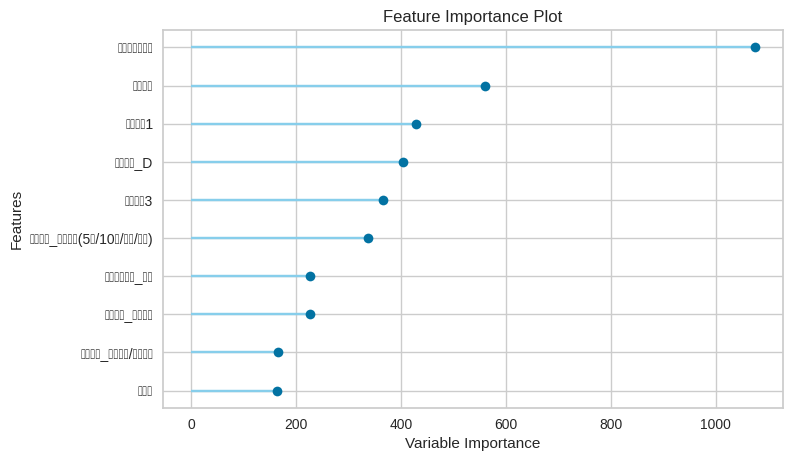

In [181]:
plot_model(estimator=tuned_huber,plot='feature')

In [182]:
evaluate_model(tuned_huber)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [183]:
final_huber = finalize_model(tuned_huber)
pred = predict_model(final_huber,test)

In [184]:
pred

,총세대수,지역,공가수,subway,bus_stop,단지내주차면수,전용면적1,전용면적2,전용면적3,임대건물구분_상가,임대건물구분_아파트,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상,Label
C1072,0.271926,0.071429,0.311111,0.0,0.020408,0.392322,0.000000,0.303745,0.242890,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,685.750301
C1128,0.512215,0.071429,0.200000,0.0,0.040816,0.712058,0.000000,0.538141,0.444274,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1278.963685
C1456,0.217861,0.500000,0.400000,0.0,0.306122,0.310738,0.032258,0.190707,0.135281,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,519.536418
C1840,0.207449,0.785714,0.155556,0.0,0.040816,0.308338,0.000000,0.352982,0.064566,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,523.934541
C1332,0.489387,0.071429,0.244444,0.0,0.020408,0.649670,0.000000,0.688627,0.233666,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1146.106913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2456,0.109732,0.857143,0.377778,0.0,0.061224,0.144571,0.044060,0.162275,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,201.046475
C1266,0.208650,1.000000,0.777778,0.0,0.000000,0.338332,0.070810,0.285021,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,374.066377
C2152,0.018022,0.000000,0.200000,0.0,0.000000,0.006599,0.047207,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.723574
C1267,0.240288,0.142857,0.844444,0.0,0.000000,0.262747,0.143194,0.212205,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,440.133450


In [185]:
submission['num'] = pred['Label'].values
submission

,code,num
0,C1072,685.750301
1,C1128,1278.963685
2,C1456,519.536418
3,C1840,523.934541
4,C1332,1146.106913
...,...,...
145,C2456,201.046475
146,C1266,374.066377
147,C2152,7.723574
148,C1267,440.133450


In [ ]:
submission.to_csv('submission_pycaret(huber).csv',index = False)